<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

### Carga de datos

In [77]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,AveragePooling2D

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


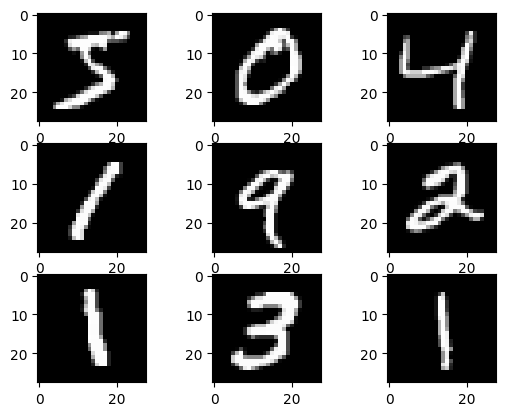

In [78]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [79]:
trainX.shape

(60000, 28, 28)

In [80]:
trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [81]:
trainy.shape

(60000,)

In [82]:
trainy[1]

0

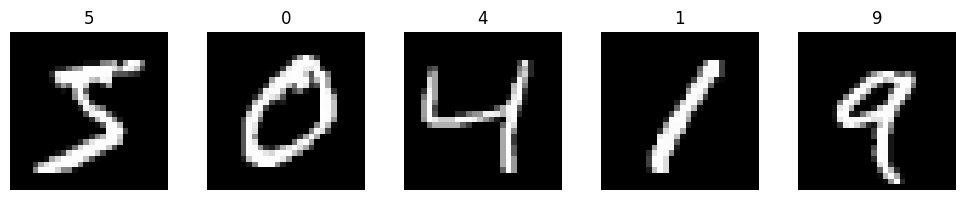

In [83]:
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
  axs[i].imshow(trainX[i], cmap='gray')
  axs[i].set_title(trainy[i])
  axs[i].axis('off')

plt.tight_layout()
plt.show()

### Preprocesamiento

In [84]:
x2_train = tf.pad(trainX, [[0, 0], [2,2], [2,2]])/255 # padding 2 pixels to each side
x2_test = tf.pad(testX, [[0, 0], [2,2], [2,2]])/255
x2_train.shape

TensorShape([60000, 32, 32])

In [85]:
x2_train=tf.expand_dims(x2_train,axis=3,name=None)
x2_test=tf.expand_dims(x2_test,axis=3,name=None)
print(x2_train.shape, trainy.shape, x2_test.shape, testy.shape)

(60000, 32, 32, 1) (60000,) (10000, 32, 32, 1) (10000,)


In [86]:
def leNet(X_train,activation='relu'):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation=activation, input_shape=X_train.shape[1:]))
    model.add(AveragePooling2D())
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation=activation))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(120, activation=activation))
    model.add(Dense(84, activation=activation))
    model.add(Dense(10, activation='softmax'))
    return model

In [87]:
model = leNet(x2_train)

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 120)              

In [89]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
history=model.fit(x2_train, trainy, epochs=20, batch_size=128, validation_data=(x2_test, testy))

Epoch 1/20
469/469 [==============================] - 29s 60ms/step - loss: 0.3456 - accuracy: 0.8995 - val_loss: 0.1057 - val_accuracy: 0.9679
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0975 - accuracy: 0.9707 - val_loss: 0.0672 - val_accuracy: 0.9796
Epoch 3/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0727 - accuracy: 0.9785 - val_loss: 0.0518 - val_accuracy: 0.9831
Epoch 4/20
469/469 [==============================] - 27s 59ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0564 - val_accuracy: 0.9821
Epoch 5/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0373 - val_accuracy: 0.9875
Epoch 6/20
469/469 [==============================] - 29s 63ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0385 - val_accuracy: 0.9880
Epoch 7/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0323 - val_accuracy:

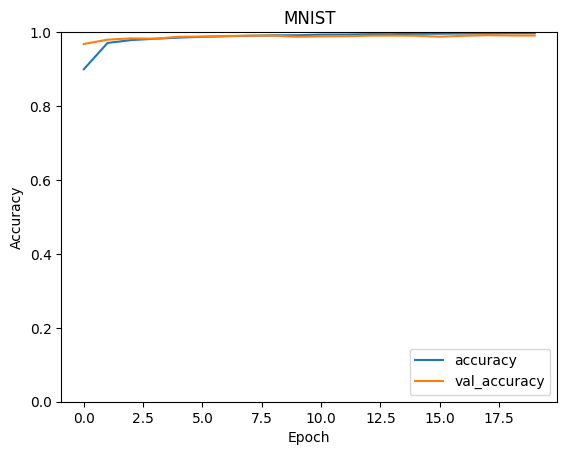

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 3s 10ms/step


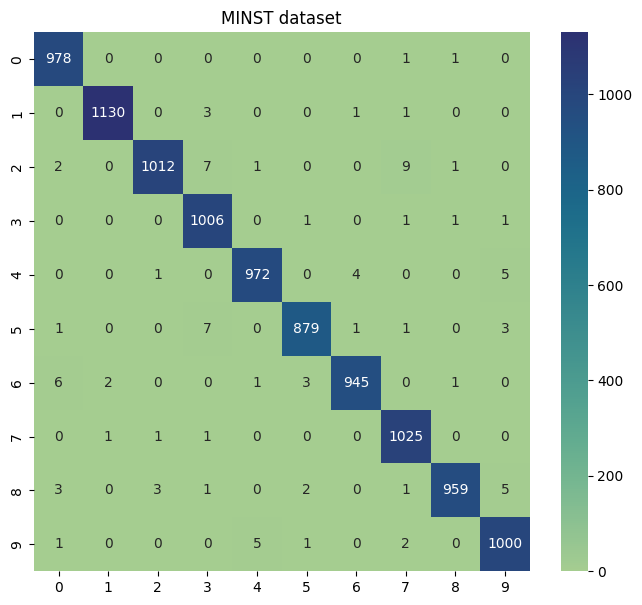

In [95]:
import seaborn as sns
predy=model.predict(x2_test)
predy=np.argmax(predy,axis=1)
confusion_matrix=tf.math.confusion_matrix(testy,predy)
plt.figure(figsize=(8, 7))
plt.title('MINST dataset')
sns.heatmap(confusion_matrix, cmap="crest", annot=True, fmt='g')
plt.show()